# PIMA Indian Diabetes Dataset 4

( Dataset removing outliers and rows
having missing values)

Machine Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load the dataset

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.shape

(768, 9)

Plot histogram of Pregnancy

In [8]:
df['Pregnancies'].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

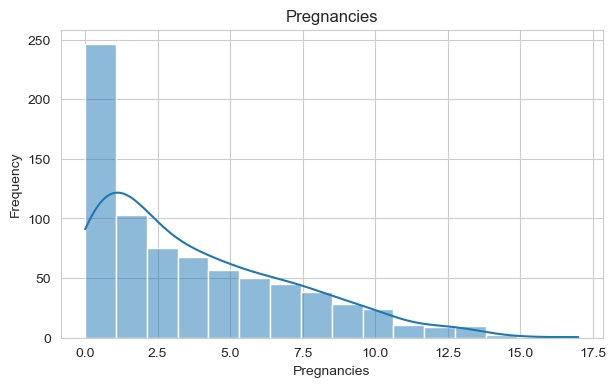

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,4))
sns.histplot(df['Pregnancies'],kde=True)
plt.title("Pregnancies")
plt.xlabel('Pregnancies')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#sns.heatmap(df.corr(), annot=True)


Replace 'zero' with null

In [10]:
# Copy the first 8 columns
rows_to_impute = df.iloc[:, 1:8].copy()

# Replace zero values with NaN
rows_to_impute.replace(0, np.nan, inplace=True)

# Update df with the processed data
df.iloc[:, 1:8] = rows_to_impute
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0      NaN  33.6   
1              1     85.0           66.0           29.0      NaN  26.6   
2              8    183.0           64.0            NaN      NaN  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0      NaN  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0            NaN      NaN  30.1   
767            1     93.0           70.0           31.0      NaN  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

Drop row that have null

In [11]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [12]:
df = df.dropna()
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
6              3     78.0           50.0           32.0     88.0  31.0   
8              2    197.0           70.0           45.0    543.0  30.5   
13             1    189.0           60.0           23.0    846.0  30.1   
..           ...      ...            ...            ...      ...   ...   
753            0    181.0           88.0           44.0    510.0  43.3   
755            1    128.0           88.0           39.0    110.0  36.5   
760            2     88.0           58.0           26.0     16.0  28.4   
763           10    101.0           76.0           48.0    180.0  32.9   
765            5    121.0           72.0           23.0    112.0  26.2   

     DiabetesPedigreeFunction  Age  Outcome  
3                       0.167   21        0  
4                  

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    float64
 2   BloodPressure             392 non-null    float64
 3   SkinThickness             392 non-null    float64
 4   Insulin                   392 non-null    float64
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    int64  
 8   Outcome                   392 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 30.6 KB


In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Detect and remove outliers

In [1]:
for col in df.columns:
  plt.figure(figsize=(5, 3)) # Create a new figure for each boxplot
  plt.boxplot(df[col])
  plt.title(f"Box Plot for {col}")
  plt.xlabel(col)
  plt.ylabel("Value")
  plt.grid(True)
  plt.show()

NameError: name 'plt' is not defined

In [16]:
factor = 3  

def remove_outliers(df, factor):
    for column in df.columns:
        upper_lim = df[column].mean() + df[column].std() * factor
        lower_lim = df[column].mean() - df[column].std() * factor

        # Remove outliers
        df = df[(df[column] < upper_lim) & (df[column] > lower_lim)]
        print(df.shape)
    return df

In [17]:
df_cleaned = remove_outliers(df, factor)

(386, 9)
(386, 9)
(381, 9)
(380, 9)
(372, 9)
(370, 9)
(366, 9)
(363, 9)
(363, 9)


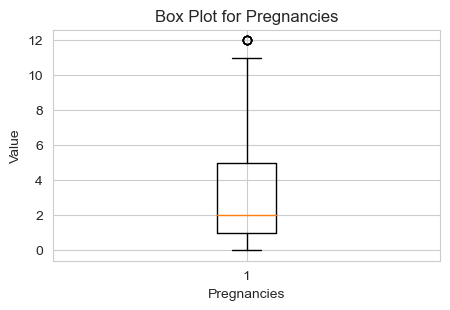

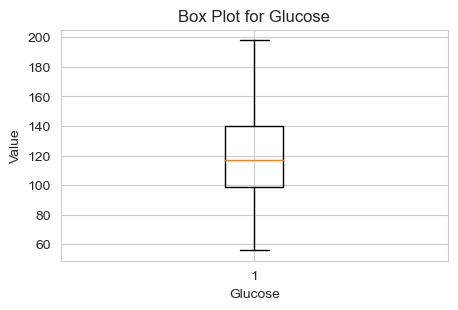

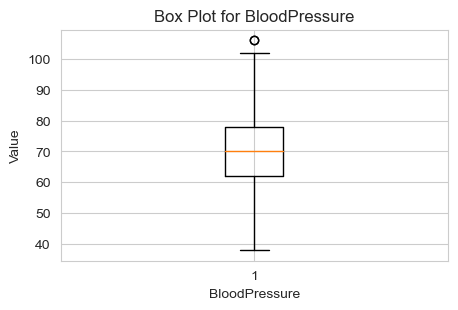

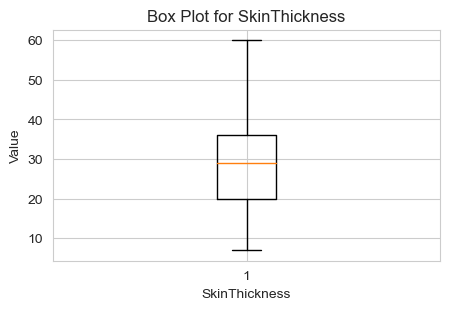

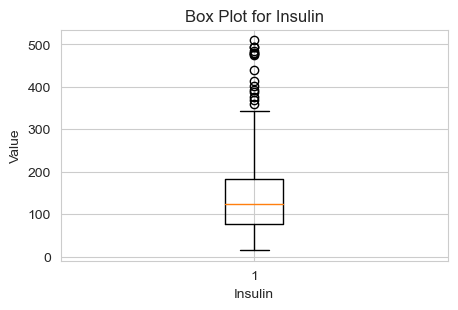

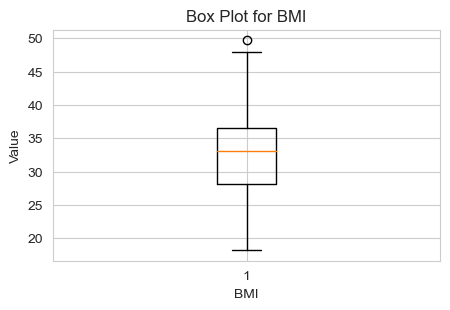

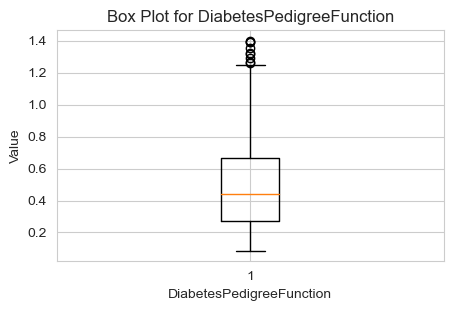

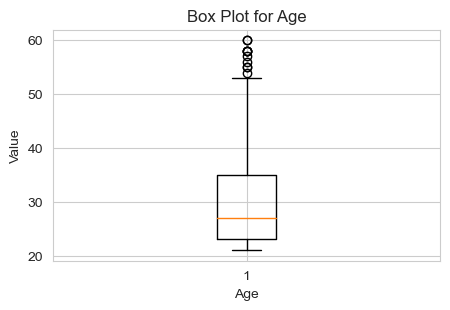

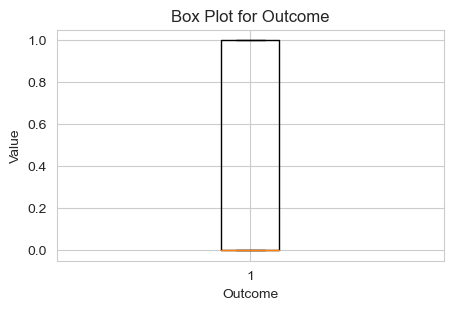

In [18]:
def plot_boxplots(df):
    for column in df.columns:
        if df[column].dtype in ['float64', 'int64']:  # Only plot numeric columns
            # Plot the boxplot for the current column
            plt.figure(figsize=(5, 3))  # Create a new figure for each boxplot
            plt.boxplot(df[column])
            plt.title(f"Box Plot for {column}")
            plt.xlabel(column)
            plt.ylabel("Value")
            plt.grid(True)
            plt.show()

# Plot the boxplots for the cleaned DataFrame
plot_boxplots(df_cleaned)

In [19]:
df = df_cleaned

In [20]:
df.shape

(363, 9)

In [21]:
df['Outcome'].value_counts()

Outcome
0    249
1    114
Name: count, dtype: int64

Split Data 80:20

In [22]:
x = df.iloc[:,0:8] #select all rows, select columns 0 to 8
y = df['Outcome']

In [23]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26
14,5,166.0,72.0,19.0,175.0,25.8,0.587,51
16,0,118.0,84.0,47.0,230.0,45.8,0.551,31
19,1,115.0,70.0,30.0,96.0,34.6,0.529,32


In [24]:
y.sample(5)

359    1
85     0
716    1
225    0
236    1
Name: Outcome, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(x ,y , test_size=0.2, random_state=66)
# Split train and test into 80:20

In [26]:
X_train.shape

(290, 8)

In [27]:
y_train.shape

(290,)

In [28]:
x_test.shape

(73, 8)

Random Forest

Baseline model with default parameters

In [29]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a RandomForestClassifier object
rf_classifier = RandomForestClassifier(n_estimators=5)

# Fit the model on training data
rf_classifier.fit(X_train, y_train)

# Make predictions on new data
y_pred = rf_classifier.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Data: {accuracy:.4f}")

Accuracy on Test Data: 0.7397
CPU times: user 149 ms, sys: 18.4 ms, total: 168 ms
Wall time: 331 ms


In [30]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0])

In [31]:
y_test

385    0
153    0
70     1
700    0
713    0
      ..
369    1
68     0
69     0
527    0
232    0
Name: Outcome, Length: 73, dtype: int64

In [32]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
acc = accuracy_score(y_test,y_pred)

[[46 11]
 [ 8  8]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        57
           1       0.42      0.50      0.46        16

    accuracy                           0.74        73
   macro avg       0.64      0.65      0.64        73
weighted avg       0.76      0.74      0.75        73



Grid Search

In [33]:
parameters ={
      'criterion' : ['gini', 'entropy'],
      'max_features': ['sqrt'],
      'random_state': range(1, 51, 5),
      'min_samples_leaf': range(1, 51, 5),
      'n_estimators': range(1, 51, 5)}

In [34]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Create a RandomForestClassifier object
clf = RandomForestClassifier()
rf_classifier = GridSearchCV(clf, parameters, cv=5, scoring='f1',n_jobs=-1 ,error_score='raise')

# Fit the model on training data
rf_classifier.fit(X_train, y_train)

# Get the best estimator from the GridSearch
best_model = rf_classifier.best_estimator_

# Make predictions on the test data
y_pred = best_model.predict(x_test)

CPU times: user 2.73 s, sys: 247 ms, total: 2.98 s
Wall time: 32.5 s


In [35]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Best Parameters: {rf_classifier.best_params_}")
print(f"Accuracy on Test Data: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Best Parameters: {'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 6, 'n_estimators': 6, 'random_state': 16}
Accuracy on Test Data: 0.7260
Precision: 0.3571
Recall: 0.3125
F1-Score: 0.3333


In [36]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
acc2 = accuracy_score(y_test,y_pred)

[[48  9]
 [11  5]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.83        57
           1       0.36      0.31      0.33        16

    accuracy                           0.73        73
   macro avg       0.59      0.58      0.58        73
weighted avg       0.71      0.73      0.72        73

